In [1]:
#!pwd
#!source activate sed_env

In [2]:
!pwd
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import splat
import astropy.units as u
from sedkit import SED
import astropy.units as u
from bokeh.io import output_notebook
from bokeh.plotting import show
from pkg_resources import resource_filename
output_notebook()
#%matplotlib inline

/Users/caganze/research/J1624/notebooks
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


Loading BokehJS ...

In [3]:
#from astroquery.svo_fps import SvoFps
DATA_FOLDER='/users/caganze/research/J1624/data/'
FIG_FOLDER='/users/caganze/research/J1624/figures/'

In [4]:
import sys
sys.version

'3.8.5 (default, Sep  4 2020, 02:22:02) \n[Clang 10.0.0 ]'

In [5]:
data_folder='/users/caganze/research/J1624/data/'
df=pd.read_csv(data_folder+'/j1624_kast_nires.csv')

In [6]:
castar = SED(name='J1624')
castar.ra=246.0684208*u.deg
castar.dec=-32.2037824*u.deg
#spectral type
castar.spectral_type = (65, 0.0)
#castar.age=(2.05*u.Gyr, 1.54*u.Gyr)
castar.parallax=(59.01*u.mas, 0.12*u.mas)
#wise photometry
castar.add_photometry('WISE.W1', 7.936, 0.026)
castar.add_photometry('WISE.W2', 7.768, 0.020)
castar.add_photometry('WISE.W3', 7.650, 0.018)
castar.add_photometry('WISE.W4', 7.329, 0.154)
#2mass photometry
castar.add_photometry('2MASS.J', 9.150, 0.026)
castar.add_photometry('2MASS.H', 8.470, 0.029)
castar.add_photometry('2MASS.Ks', 8.154, 0.023) 

#gaia photometry
castar.add_photometry('PS1.g', 14.6207, 0.0012)
castar.add_photometry('Gaia.G', 12.9, 0.0139)
castar.add_photometry('Gaia.bp', 14.2129, 0.0045)
castar.add_photometry('Gaia.rp', 11.0375, 0.0030)

#add optical V band photometry
castar.add_photometry('Johnson.V', 13.96, 0.039)
#castar.add_photometry('Johnson.B', 15.745, 0.03)

[sedkit] SED initialized
[sedkit] Setting name to J1624
[sedkit] Setting sky_coords to <SkyCoord (ICRS): (ra, dec) in deg
    (246.0684208, -32.2037824)>
[sedkit] There was a problem determining the interstellar reddening. Setting to 0. You can manually set this with the 'reddening' attribute.
[sedkit] Setting radius to (<Quantity 0.24 solRad>, <Quantity 0.02 solRad>, <Quantity 0.02 solRad>) with reference '2013ApJS..208....9P'
[sedkit] Setting spectral_type to (65, 0.5, 'V', None, None) with reference 'None'
[sedkit] Setting parallax to (<Quantity 59.01 mas>, <Quantity 0.12 mas>) with reference 'None'
[sedkit] Setting distance to (<Quantity 16.95 pc>, <Quantity 0.03 pc>, <Quantity 0. pc>) with reference 'None'
[sedkit] Setting WISE.W1 photometry to 7.936 (0.026) with reference 'None'
[sedkit] Setting WISE.W2 photometry to 7.768 (0.020) with reference 'None'
[sedkit] Setting WISE.W3 photometry to 7.650 (0.018) with reference 'None'
[sedkit] Setting WISE.W4 photometry to 7.329 (0.154) w

In [7]:
#castar.spectral_type?

In [8]:
castar.find_SDSS()

[sedkit] 0 records found in V/147.


In [9]:
#castar.add_photometry('USNO.B1', 11.0375, 0.0030)

In [10]:
#find v band photometry
castar.find_Simbad()


In [11]:
#s=splat.Spectrum(wave=df['wave (micron)'].values*u.micron,
#                flux=df['flux (funits)'].values*u.erg/u.micron/u.s/(u.cm**2),
#                noise=df['noise'].values*u.erg/u.micron/u.s/(u.cm**2))
#add a mask
#mask=df['mask']
#MASK OUT OPTICAL SPECTRUM
#mask=np.logical_or(mask, s.wave.value<1.0)
from sedkit import Spectrum

In [12]:
#import kastredux
FUNITS=u.erg/u.micron/u.s/(u.cm**2)
WUNITS=u.micron
#f=DATA_FOLDER+'/kastBLUE_J1624-3212_20200722.fits'
#fr=DATA_FOLDER+'/kastRED_J1624-3212_20210404.txt'
#sblue=kastredux.readSpectrum(f)
#sred=kastredux.readSpectrum(fr)

In [13]:
blue=np.load(DATA_FOLDER+'/scaled_blue.npy')
red=np.load(DATA_FOLDER+'/scaled_red.npy')
ir=np.load(DATA_FOLDER+'/scaled_infrared.npy')

[None, None]

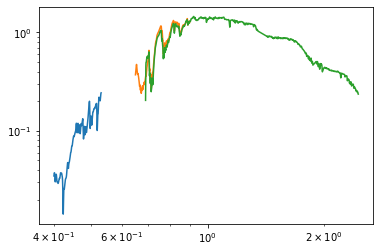

In [14]:
fig, ax=plt.subplots()
ax.plot(blue[0], blue[1])
ax.plot(red[0], red[1])
ax.plot(ir[0], ir[1])
ax.set(yscale='log', xscale='log')

In [15]:
tot_spectrum= Spectrum( np.concatenate([blue[0], red[0], ir[0]])*WUNITS, \
                        np.concatenate([blue[1], red[1], ir[1]])*FUNITS,
                        np.concatenate([blue[-1], red[-1], ir[-1]])*FUNITS, name='total_spec')

In [16]:
#blue_mask= np.logical_or(sblue.wave.value < 3600, sblue.wave.value >5400)
#red_mask= np.logical_or(sred.wave.value < 6000, sred.wave.value >9000)

In [17]:
opt_blue=Spectrum(blue[0]*WUNITS, blue[1]*FUNITS, blue[-1]*FUNITS, name='J1624 blue')
opt_red=Spectrum(red[0]*WUNITS, red[1]*FUNITS, red[-1]*FUNITS, name='J1624 red')
sxd=Spectrum(ir[0]*WUNITS, ir[1]*FUNITS,ir[-1]*FUNITS, name='J1624 sxd')

In [18]:

#palomar_blue.flux_calibrate?

In [19]:

#castar.add_spectrum(opt_blue)
#castar.add_spectrum(opt_red)
#castar.add_spectrum(sxd)

In [20]:
castar.add_spectrum(tot_spectrum)

[sedkit] Spectrum added.


In [21]:
# Fit to infer spectral type
castar.fit_spectral_type()
# Fit to infer fundamental params
from sedkit import BTSettl
#castar.fit_modelgrid(BTSettl())
#castar.make_sed
#castar.fit_blackbody()

[sedkit] Setting fbol to (<Quantity 1.0430321e-09 erg / (cm2 s)>, <Quantity 2.0513886e-12 erg / (cm2 s)>) with reference 'This Work'
[sedkit] Setting Lbol to (<Quantity 3.58548603e+31 erg / s>, <Quantity 1.45194354e+29 erg / s>) with reference 'This Work'
[sedkit] Setting Lbol_sun to (-2.028, 0.002) with reference 'This Work'
[sedkit] Setting mbol to (10.972, 0.002) with reference 'This Work'
[sedkit] Setting Mbol to (9.826, 0.003) with reference 'This Work'
[sedkit] Could not calculate logg without Lbol and age
[sedkit] Setting mass to (<Quantity 0.31 solMass>, <Quantity 0. solMass>, <Quantity 0. solMass>) with reference '2013ApJS..208....9P'
[sedkit] Setting Teff to (<Quantity 3665 K>, <Quantity 152 K>) with reference 'This Work'
[sedkit] Best fit SpeX Prism Library spec: Opt:M4V
[sedkit] Setting Lbol to (<Quantity 3.58548603e+31 erg / s>, <Quantity 1.45194354e+29 erg / s>) with reference 'This Work'
[sedkit] Setting Lbol_sun to (-2.028, 0.002) with reference 'This Work'
[sedkit] Set

In [22]:
from bokeh.plotting import  output_file, save
#f=castar.plot(integral=True, best_fit=True, one_color=False)

In [23]:
#castar.results

In [24]:

#castar.fit_spectral_type()
castar.fit_modelgrid(BTSettl())

[sedkit] Best fit BT-Settl spec: 3100.0/5.5/0.0/0.0
[sedkit] Setting Lbol to (<Quantity 3.58548603e+31 erg / s>, <Quantity 1.45194354e+29 erg / s>) with reference 'This Work'
[sedkit] Setting Lbol_sun to (-2.028, 0.002) with reference 'This Work'
[sedkit] Setting Mbol to (9.826, 0.003) with reference 'This Work'
[sedkit] Could not calculate logg without Lbol and age
[sedkit] Setting Teff to (<Quantity 3665 K>, <Quantity 152 K>) with reference 'This Work'


In [25]:
castar

In [26]:
f=castar.plot(integral=True, best_fit=True, one_color=False, synthetic_photometry=True, blackbody=False)


In [27]:
castar.results

param,value,unc,units
object,object,object,object
name,J1624,--,--
ra,246.0684208,--,--
dec,-32.2037824,--,--
age,--,--,--
membership,--,--,--
distance,16.95,0.03,pc
parallax,59.01,0.12,mas
SpT,M5V,--,--
spectral_type,65,0.5,--


In [28]:
castar.calculate_synthetic_photometry()

In [29]:
castar.fundamental_params()

[sedkit] Setting Lbol to (<Quantity 3.58548603e+31 erg / s>, <Quantity 1.45194354e+29 erg / s>) with reference 'This Work'
[sedkit] Setting Lbol_sun to (-2.028, 0.002) with reference 'This Work'
[sedkit] Setting Mbol to (9.826, 0.003) with reference 'This Work'
[sedkit] Could not calculate logg without Lbol and age
[sedkit] Setting Teff to (<Quantity 3665 K>, <Quantity 152 K>) with reference 'This Work'


In [30]:
#castar.__dict__

In [31]:
import matplotlib as mpl
#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['xtick.bottom']=True
mpl.rcParams['xtick.top']=True
mpl.rcParams['xtick.major.width']=0.9
mpl.rcParams['xtick.minor.width']=0.9
mpl.rcParams['ytick.major.width']=0.9
mpl.rcParams['ytick.minor.width']=0.9
mpl.rcParams['ytick.right']=True
mpl.rcParams['ytick.left']=True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'

mpl.rcParams['font.serif'] = 'Ubuntu'
#mpl.rcParams['font.monospace'] = 'Ubuntu Mono'
mpl.rcParams["mathtext.fontset"] = "dejavuserif"

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['figure.titlesize'] = 18

In [32]:
 #castar.stitched_spectra[1].flux

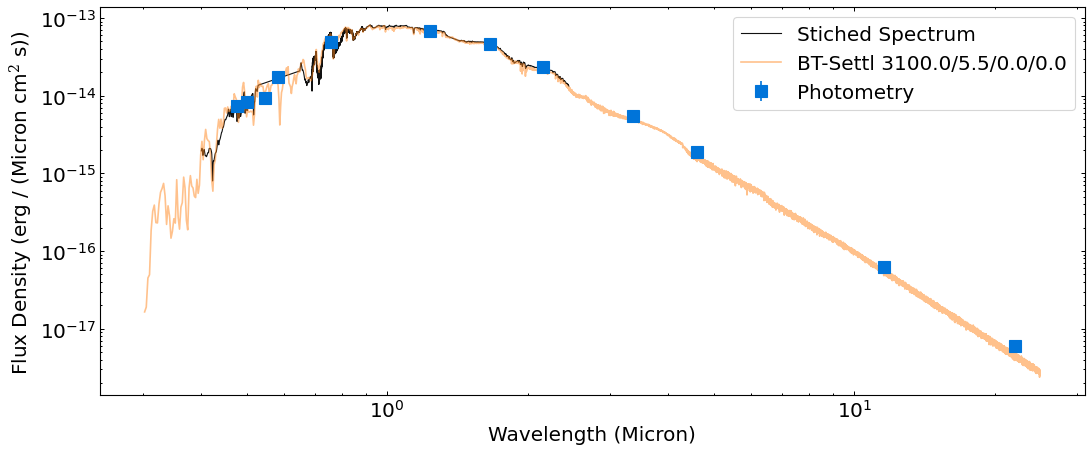

In [33]:
fig, ax=plt.subplots(figsize=(14, 6))

#ax.errorbar(castar.stitched_spectra[0].wave, castar.stitched_spectra[0].flux, 
#            yerr=castar.stitched_spectra[0].unc, fmt='.') 
#ax.plot(castar.stitched_spectra[-1].wave, castar.stitched_spectra[-1].flux, c='k', label='KAST Blue')
ax.plot(castar.stitched_spectra[0].wave, castar.stitched_spectra[0].flux, c='#111111', lw=1, label='Stiched Spectrum')
#ax.plot(castar.stitched_spectra[1].wave, castar.stitched_spectra[1].flux, c='#111111', lw=2,)
#plt.plot(castar.app_phot_SED.wave, castar.app_phot_SED.flux)
plt.plot(castar.best_fit['BT-Settl spec']['spectrum'][0], 
         castar.best_fit['BT-Settl spec']['spectrum'][-1] , \
         alpha=0.5, label='BT-Settl {}'.format(castar.__dict__['BT-Settl spec']), color='#FF851B')

ax.errorbar(castar._photometry['eff'].value,
             castar._photometry['app_flux'].value, 
             yerr= castar._photometry['app_flux_unc'].value, fmt='s', \
            label='Photometry', ms=10, color='#0074D9')

#ax.errorbar(castar._synthetic_photometry['eff'].value,
#             castar._synthetic_photometry['app_flux'].value, 
#             yerr= castar._synthetic_photometry['app_flux_unc'].value, fmt='o', label='Synth Photometry')


ax.set(xscale= 'log', yscale='log', 
       xlabel='Wavelength (Micron)',
       ylabel=r'Flux Density (erg / (Micron cm$^2$ s)) ')
plt.tight_layout()
plt.legend(fontsize=18)
plt.savefig(FIG_FOLDER+'/sed_fit_wth_blue.pdf')

In [35]:
castar.

<bound method SED.add_spectrum_file of <sedkit.sed.SED object at 0x7fdafc5ddc70>>